# OPENCV NOTEBOOK

#  Histograms
A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image.
It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity 
(pixel value) distribution.

##  Using cv2.calcHist to visulaize the histograms
Let’s quickly review the function: 

         cv2.calcHist(images,channels,mask,histSize,ranges)

1. images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].

2. channels: This is a list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0,1,2].

3. mask: Remember learning about masks in Chapter 4? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.

4. histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32,32,32]. 917.2 grayscale histograms

5. ranges: Here we specify The range of possible pixel values. Normally, this is [0, 256] for each channel, but if you are using a color space other than RGB (such as HSV), the ranges might be different.

## GrayScale Histograms

In [1]:
# Import libraries
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

Shape:  (350, 600, 3)


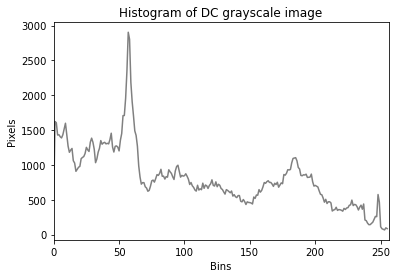

-1

In [2]:
# Read the image 
image = cv2.imread('images/dc.jpg')
print("Shape: ", image.shape)

# Change BGR to GrayScale to visuzlize the histograms
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("GrayScale of DC", gray)

# Visualize Histograms
# Call the cv2.calcHist in the hist varaible
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
# Plot the hist using matplotlib
plt.figure()
plt.title("Histogram of DC grayscale image")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.plot(hist, color='gray')
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

## Color Histograms

In [3]:
# Read the image
image = cv2.imread("images/dc.jpg")
image.shape

(350, 600, 3)

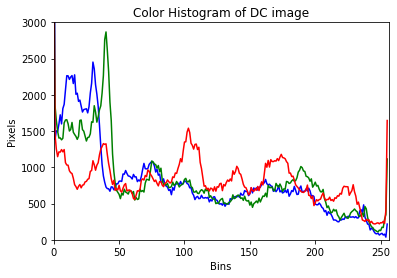

In [5]:
# Split the channels of the image 
chans = cv2.split(image)
# Colors we want the histograms 
colors = ("b", "g", "r")

# Plot functions
plt.figure()
plt.title('Color Histogram of DC image')
plt.xlabel('Bins')
plt.ylabel("Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])

2D histogram shape: (32, 32), with 1024 values


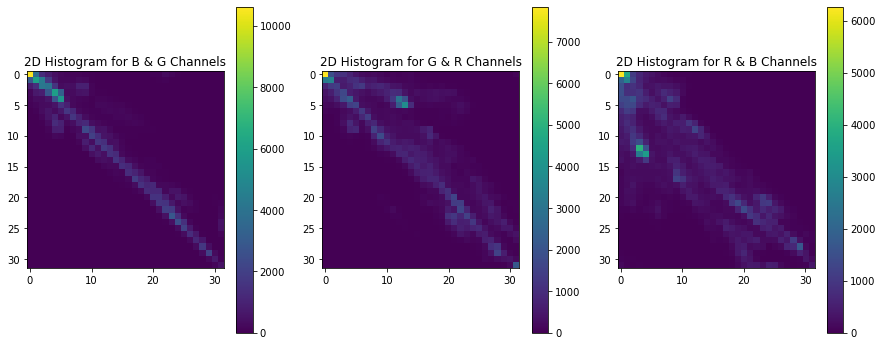

In [6]:
# Histograms on two channels at the same time
fig = plt.figure(figsize=(15, 6))

# Subplot for 
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[0], chans[1]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Histogram for B & G Channels")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Histogram for G & R Channels")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[2], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Histogram for R & B Channels")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

In [8]:
# 3D Histograms
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))
plt.show()

3D histogram shape: (8, 8, 8), with 512 values


The code here is very simple – it’s just an extension of the
code above. We are now computing an 8 × 8 × 8 histogram
for each of the RGB channels. We can’t visualize this histogram, but we can see that the shape is indeed (8,8,8)
with 512 values.

## Histogram Equalization
Histogram equalization improves the contrast of an image
by “stretching” the distribution of pixels.
This method is useful when an image contains foregrounds and backgrounds that are both dark or both light. It
tends to produce unrealistic effects in photographs; however, it is normally useful when enhancing the contrast of
medical or satellite images.

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eq = cv2.equalizeHist(gray)

cv2.imshow("Histogram Equalization", np.hstack([gray, eq]))
cv2.waitKey(0)

-1

## Histograms and Masks

In [11]:
# Create a function to plot the histogram for colo channels
def plot_histogram(image, title, mask=None, ylim=(0, 3000)):
    # Split the image 
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    # Plot functions
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("Pixels")
    
    # Histogram (for loop)
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim(0, 256)
        plt.ylim(ylim)

-1

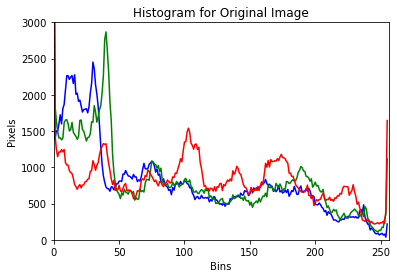

In [12]:
plot_histogram(image, "Histogram for Original Image")
cv2.imshow("Original Image", image)
cv2.waitKey(0)

In [14]:
# Creating the mask for shazam⚡
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.rectangle(mask, (550, 0), (440, 100), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Masked", masked)
cv2.waitKey(0)

-1

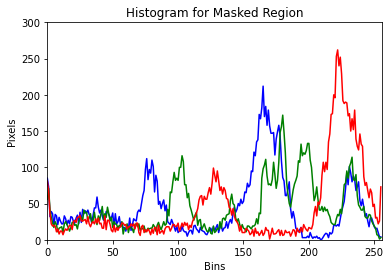

In [15]:
# Now, plot the histogram for the masked region
plot_histogram(image, "Histogram for Masked Region", mask=mask, ylim=(0, 300))